In [1]:
%%capture
import pandas as pd, os, nltk, tensorflow as tf
from nltk.corpus import stopwords
import numpy as np
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from nltk.corpus import words
nltk.download('stopwords')
nltk.download('words')
nltk.download('punkt_tab')

import logging


In [2]:
logging.basicConfig(filename='app.log', level=logging.INFO, format='%(asctime)s - %(message)s')


### **Prepare Dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_folder = '/content/drive/MyDrive/'
googlie_review = os.path.join(base_folder, 'NPS_reviews_on_Tab_2023.xlsm')
nps_review = os.path.join(base_folder, 'Google_reviews_data_2023.xlsm')

In [5]:
_googlie_review = pd.read_excel(googlie_review)
_nps_review = pd.read_excel(nps_review)


In [6]:
_googlie_review.head()

,Date,Rating,Store Id,Remarks,Name,Contact,Sentiment: Positive(0)/Negative(1)/Neutral(2)
0,2023-12-31,6.25,4001,fine,Simran Naz,3.046542e+09,2
1,2023-12-31,5.00,4001,noo,munaza,3.025506e+09,1
2,2023-12-31,6.00,4001,well done happy new year do sale offer,Fahad sheikh,3.218488e+09,0
3,2023-12-31,6.25,4035,good,Ayesha khald,3.217313e+09,0
4,2023-12-30,5.75,1128,excellent,Rawish,3.349101e+09,0


In [7]:
_nps_review.head()

,Date,Store Code,City,Rating,Comments,Review Reply,Reply Date,Customer Name,Sentiment: Positive(0)/Negative(1)/Neutral(2)
0,2023-12-30 00:00:00,1041.0,Wapda Town Lahore,5.0,Very cooperative staff,Thank you for your feedback.,2024-07-19,Ahmad hassan,0.0
1,2023-12-29 00:00:00,1145.0,Stylo MM Alam,4.0,Nice shoes for ladies and kids,Thank you for your feedback.,2024-07-19,Saqib Saqlain (LIFE),0.0
2,2023-12-29 00:00:00,1201.0,Rawalpindi,5.0,Nice,Thank you for your rating.,2024-07-19,MS Corporation,0.0
3,2023-12-28 00:00:00,1235.0,Lahore,3.0,The prices ar little bit high for a mediocre p...,Thank you for your feedback.,2024-07-19,Abdul Basit,2.0
4,2023-12-28 00:00:00,1022.0,Sahiwal,4.0,All type of shoes are available,Thank you for your feedback.,2024-07-19,SHAFQAT ABBAS,0.0


In [8]:
_googlie_review.rename(columns={'Remarks': 'reviews'}, inplace=True)
_nps_review.rename(columns={'Comments': 'reviews'}, inplace=True)

_googlie_review.rename(columns={'Sentiment: Positive(0)/Negative(1)/Neutral(2)': 'Sentiment'}, inplace=True)
_nps_review.rename(columns={'Sentiment: Positive(0)/Negative(1)/Neutral(2)': 'Sentiment'}, inplace=True)

In [9]:
_nps_review.head()

,Date,Store Code,City,Rating,reviews,Review Reply,Reply Date,Customer Name,Sentiment
0,2023-12-30 00:00:00,1041.0,Wapda Town Lahore,5.0,Very cooperative staff,Thank you for your feedback.,2024-07-19,Ahmad hassan,0.0
1,2023-12-29 00:00:00,1145.0,Stylo MM Alam,4.0,Nice shoes for ladies and kids,Thank you for your feedback.,2024-07-19,Saqib Saqlain (LIFE),0.0
2,2023-12-29 00:00:00,1201.0,Rawalpindi,5.0,Nice,Thank you for your rating.,2024-07-19,MS Corporation,0.0
3,2023-12-28 00:00:00,1235.0,Lahore,3.0,The prices ar little bit high for a mediocre p...,Thank you for your feedback.,2024-07-19,Abdul Basit,2.0
4,2023-12-28 00:00:00,1022.0,Sahiwal,4.0,All type of shoes are available,Thank you for your feedback.,2024-07-19,SHAFQAT ABBAS,0.0


In [10]:
df_googlie_review = _googlie_review[['reviews', 'Sentiment']]
df_nps_review = _nps_review[['reviews', 'Sentiment']]

In [11]:
# drop rows with NaN or inf in 'Sentiment' column for both DataFrames
df_nps_review = df_nps_review[df_nps_review['Sentiment'].apply(lambda x: pd.isna(x) == False and np.isfinite(x))]
df_googlie_review = df_googlie_review[df_googlie_review['Sentiment'].apply(lambda x: pd.isna(x) == False and np.isfinite(x))]

# Convert the 'Sentiment' column to integers
df_nps_review['Sentiment'] = df_nps_review['Sentiment'].astype(int)
df_googlie_review['Sentiment'] = df_googlie_review['Sentiment'].astype(int)

<ipython-input-11-664b2a13c2ab>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nps_review['Sentiment'] = df_nps_review['Sentiment'].astype(int)


In [12]:
df_nps_review.head()

,reviews,Sentiment
0,Very cooperative staff,0
1,Nice shoes for ladies and kids,0
2,Nice,0
3,The prices ar little bit high for a mediocre p...,2
4,All type of shoes are available,0


In [13]:
df_googlie_review.head()

,reviews,Sentiment
0,fine,2
1,noo,1
2,well done happy new year do sale offer,0
3,good,0
4,excellent,0


In [14]:
df_googlie_review.shape, df_nps_review.shape

((166, 2), (723, 2))

In [15]:
df_concatenate = pd.concat([df_googlie_review, df_nps_review], ignore_index=True)

df_concatenate.shape

(889, 2)

In [16]:
df_concatenate.head()

,reviews,Sentiment
0,fine,2
1,noo,1
2,well done happy new year do sale offer,0
3,good,0
4,excellent,0


In [17]:
df_concatenate.isnull().sum()

,0
reviews,2
Sentiment,0


In [18]:
df_concatenate.dropna(inplace=True)

In [19]:
df_concatenate.shape

(887, 2)

### **Preprocess Datset**

In [20]:
# Define the valid words set
valid_words = set(nltk.corpus.words.words())

# Define the custom preprocessing function
def custom_preprocessing(text):
    if isinstance(text, float) and str(text) == "nan":
        return ""

    tokens = word_tokenize(text.lower())
    filtered_tokens = [
        token
        for token in tokens
        if token not in stopwords.words("english")  # Remove stopwords
        and 3 <= len(token) <= 40  # Token length constraint
        and token.isascii()  # Check if it's a valid word
    ]
    return filtered_tokens  # Return preprocessed text as a string

def tensorflow_preprocessing(df):
  # Apply preprocessing and save it to a new column
  df["preprocessed_review"] = df['reviews'].apply(custom_preprocessing)

  # Create a Tokenizer and fit on the preprocessed text
  tokenizer = tf.keras.preprocessing.text.Tokenizer(
      num_words=None,  # Include all words
      filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n۔',  # Default filter
      lower=True,
      char_level=False,
      oov_token="<OOV>",  # Out-of-vocabulary token
  )

  # Fit the tokenizer on the preprocessed reviews
  tokenizer.fit_on_texts(df["preprocessed_review"])

  # Tokenize the text into sequences
  df["tokenized_sequence"] = tokenizer.texts_to_sequences(df["preprocessed_review"])

  # Get the word index mapping
  word_index = tokenizer.word_index

  return df , tokenizer

df_preprocessed, tokenizer = tensorflow_preprocessing(df_concatenate)

logging.info('Preprocessing by removing nulls and only keeping valid words set ')

In [21]:
df_preprocessed.tail()

,reviews,Sentiment,preprocessed_review,tokenized_sequence
884,One of the best mall in Attock,0,"[one, best, mall, attock]","[34, 13, 250, 1474]"
885,Wonderful shoe store,0,"[wonderful, shoe, store]","[1475, 29, 15]"
886,Poor quality and very bad consumer services,1,"[poor, quality, bad, consumer, services]","[99, 7, 18, 1476, 93]"
887,Good stuff for ladies and children,0,"[good, stuff, ladies, children]","[2, 51, 10, 151]"
888,Overall good experience and cooperative staff,0,"[overall, good, experience, cooperative, staff]","[71, 2, 9, 31, 4]"


In [22]:
df_preprocessed.isnull().sum()

,0
reviews,0
Sentiment,0
preprocessed_review,0
tokenized_sequence,0


In [23]:
X = df_preprocessed['preprocessed_review']  # Features (input text)
y = df_preprocessed['Sentiment']  # Target labels (sentiment labels)

### **Splitting dataset**

In [24]:

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verify the split
print(f"Training data size: {len(X_train)}")
print(f"Testing data size: {len(X_test)}")


Training data size: 709
Testing data size: 178


In [31]:
logging.info('Taking 80-20 train-test split')

### **BASELINE MODEL**

In [25]:
#Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [32]:
logging.info('Applying Bayes Classifier as our baseline')

In [26]:
X_train_str = X_train.apply(' '.join)
X_test_str = X_test.apply(' '.join)

# Now you can fit the CountVectorizer on the strings
clf = CountVectorizer()
X_train_cv = clf.fit_transform(X_train_str)
X_test_cv = clf.transform(X_test_str)

In [27]:
X_train_str

,preprocessed_review
142,bad
218,costly
875,good variety ladies foot wear
877,nice shop buy shoes jewellery watches women sw...
294,best
...,...
83,good custome service nice
810,bad customer service bad staff behavior
168,nice
150,ambientwa nice staff helpful lift operate prob...


In [28]:
tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_cv)
X_train_tf = tf_transformer.transform(X_train_cv)
X_test_tf = tf_transformer.transform(X_test_cv)

In [29]:
nb_clf = MultinomialNB()
nb_clf.fit(X_train_tf, y_train)

MultinomialNB()

In [30]:
!pip install joblib
import joblib

In [33]:
joblib.dump(nb_clf, 'naive_bayes_model.pkl')


['naive_bayes_model.pkl']

In [34]:
# loading model

loaded_model = joblib.load('naive_bayes_model.pkl')

In [35]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

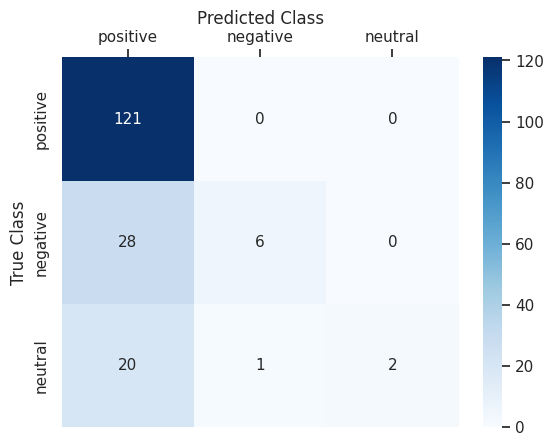

Classification Report :
               precision    recall  f1-score   support

    positive     0.7160    1.0000    0.8345       121
    negative     0.8571    0.1765    0.2927        34
     neutral     1.0000    0.0870    0.1600        23

    accuracy                         0.7247       178
   macro avg     0.8577    0.4211    0.4291       178
weighted avg     0.7796    0.7247    0.6438       178



In [36]:
def model_outcomes(model, X_test, y_test):

  #evaluate confusion matrix
  ypred_probs = model.predict_proba(X_test)  # Get predicted probabilities for each class
  ypred_classes = ypred_probs.argmax(axis=1) # Get predicted class labels
  confusion_mat = confusion_matrix(y_test, ypred_classes)

  # plot confusion matrix
  sns.set(font_scale=1.0)
  labels = ["positive", "negative", "neutral"]
  ax = sns.heatmap(confusion_mat, annot=True, annot_kws={"size": 11}, fmt='d', vmin = 0, cmap='Blues', yticklabels=labels, xticklabels=labels)
  ax.set_xlabel('Predicted Class')
  ax.set_ylabel('True Class')
  ax.xaxis.set_label_position('top')
  ax.xaxis.tick_top()
  plt.show()

  # print classification report
  report = classification_report(y_test, ypred_classes, digits = 4, output_dict=False, target_names=["positive", "negative", "neutral"],)
  print(f'Classification Report :\n {report}')



model_outcomes(loaded_model, X_test_tf, y_test)



In [37]:
logging.info('Evaluating using accuracy,recall,precision,F1')

### **DEEP LEARNING MODEL**

In [38]:
import pickle, requests, zipfile, io, numpy as np, pandas as pd, tensorflow as tf, matplotlib.pyplot as plt, seaborn as sns
from io import StringIO
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder

### **Tokenization & Padding**

In [39]:
import tensorflow as tf

# Padding the sequences to ensure uniform length
X_train_seq = df_preprocessed.loc[X_train.index, 'tokenized_sequence'].tolist()
X_test_seq = df_preprocessed.loc[X_test.index, 'tokenized_sequence'].tolist()

# Use padding to make sequences the same length
X_train_pad = tf.keras.preprocessing.sequence.pad_sequences(X_train_seq, padding='post')
X_test_pad = tf.keras.preprocessing.sequence.pad_sequences(X_test_seq, padding='post')

# Convert the target labels to numpy arrays
y_train = y_train.values
y_test = y_test.values

# Check the shapes of the padded sequences
print(f"X_train_pad shape: {X_train_pad.shape}")
print(f"X_test_pad shape: {X_test_pad.shape}")



X_train_pad shape: (709, 171)
X_test_pad shape: (178, 49)


**EMBEDDINGS**

In [40]:
import numpy as np
import requests
from io import StringIO

# Define the URL for the GloVe embeddings (in this case, GloVe 6B 100-dimensional vectors)
glove_url = "http://nlp.stanford.edu/data/glove.6B.zip"  # URL for downloading

# Download and unzip the file
import zipfile
import io

# Function to download and extract the GloVe file
def download_glove_embeddings():
    # Download the file
    response = requests.get(glove_url)

    # Use zipfile to unzip the downloaded file (directly from the content)
    with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
        zip_ref.extractall('/tmp')  # Extract to a temporary directory or your current directory

    # The file we need is `glove.6B.100d.txt`
    return '/tmp/glove.6B.100d.txt'  # Return path to the extracted file

# Call this function to download the GloVe file
glove_file_path = download_glove_embeddings()
print("GloVe file downloaded and extracted to:", glove_file_path)

logging.info('Applying GloVe embeddings')

GloVe file downloaded and extracted to: /tmp/glove.6B.100d.txt


In [ ]:
# # Create the embedding matrix from GloVe
# def create_embedding_matrix(tokenizer, glove_file_path, embedding_dim=100):
#     # Initialize the embedding matrix (one row for each word in the tokenizer)
#     embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))  # +1 for <OOV> token

#     # Load GloVe embeddings into a dictionary
#     embedding_dict = {}
#     with open(glove_file_path, 'r', encoding="utf-8") as f:
#         for line in f:
#             values = line.strip().split()
#             word = values[0]
#             vector = np.asarray(values[1:], dtype='float32')
#             embedding_dict[word] = vector

#     # Fill the embedding matrix with GloVe vectors
#     for word, i in tokenizer.word_index.items():
#         if word in embedding_dict:
#             embedding_matrix[i] = embedding_dict[word]

#     return embedding_matrix

# # Create the embedding matrix using the tokenizer and GloVe file
# embedding_matrix = create_embedding_matrix(tokenizer, glove_file_path)
# embedding_weights = embedding_matrix.get_weights()[0]

In [41]:
#extra

import tensorflow as tf
import numpy as np

# Create the embedding matrix from GloVe
def create_embedding_matrix(tokenizer, glove_file_path, embedding_dim=100):
    # Initialize the embedding matrix (one row for each word in the tokenizer)
    embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))  # +1 for <OOV> token

    # Load GloVe embeddings into a dictionary
    embedding_dict = {}
    with open(glove_file_path, 'r', encoding="utf-8") as f:
        for line in f:
            values = line.strip().split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embedding_dict[word] = vector

    # Fill the embedding matrix with GloVe vectors
    for word, i in tokenizer.word_index.items():
        if word in embedding_dict:
            embedding_matrix[i] = embedding_dict[word]

    return embedding_matrix

# Create the embedding matrix using the tokenizer and GloVe file
embedding_matrix = create_embedding_matrix(tokenizer, glove_file_path)

# Create a temporary embedding layer to use .get_weights()
temp_embedding_layer = tf.keras.layers.Embedding(
    input_dim=embedding_matrix.shape[0],
    output_dim=embedding_matrix.shape[1],
    weights=[embedding_matrix],
    trainable=False
)

# Access weights using .get_weights()
embedding_weights = temp_embedding_layer.get_weights()[0]




### **Class Weights**

In [42]:
unique_classes = np.unique(y_train.flatten())
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=unique_classes,
    y=y_train.flatten()
)
class_weights_dict = dict(zip(unique_classes, class_weights))
print("Class Weights:", class_weights_dict)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

Class Weights: {0: 0.49133749133749133, 1: 1.7506172839506173, 2: 2.5412186379928317}


### **Plot Results**

In [43]:
# Assuming `history` is the output of model.fit
def plot_training_history(history):
    # Extract accuracy and loss from the history object
    acc = history.history['accuracy']
    val_acc = history.history.get('val_accuracy', [])
    loss = history.history['loss']
    val_loss = history.history.get('val_loss', [])

    # Number of epochs
    epochs = range(1, len(acc) + 1)

    # Plot Accuracy
    plt.figure(figsize=(12, 5))

    # Accuracy subplot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Training Accuracy')
    if val_acc:
        plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss subplot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Training Loss')
    if val_loss:
        plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

### **Focal Loss**

In [44]:
def focal_loss_func(gamma=2., alpha=0.25):
    def loss_fn(y_true, y_pred):
        y_true = tf.cast(y_true, tf.int32) # Ensure y_true is of integer type
        ce = tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred, from_logits=True) # Use sparse categorical crossentropy
        pt = tf.math.exp(-ce)
        focal_loss_value = alpha * tf.math.pow(1. - pt, gamma) * ce
        return tf.reduce_mean(focal_loss_value)
    return loss_fn

In [48]:
logging.info('Using Focal Loss')

### **Classification Report**

In [45]:
def model_outcomes_deep(model, X_test, y_test):

  #evaluate confusion matrix
  ypred_probs = model.predict(X_test)  # Get predicted probabilities for each class
  ypred_classes = np.argmax(ypred_probs, axis=1)  # Get predicted class labels
  confusion_mat = confusion_matrix(y_test, ypred_classes)

  # plot confusion matrix
  sns.set(font_scale=1.0)
  labels = ["positive", "negative", "neutral"]
  ax = sns.heatmap(confusion_mat, annot=True, annot_kws={"size": 11}, fmt='d', vmin = 0, cmap='Blues', yticklabels=labels, xticklabels=labels)
  ax.set_xlabel('Predicted Class')
  ax.set_ylabel('True Class')
  ax.xaxis.set_label_position('top')
  ax.xaxis.tick_top()
  plt.show()

  # print classification report
  report = classification_report(y_test, ypred_classes, digits = 4, output_dict=False, target_names=["positive", "negative", "neutral"],)
  print(f'Classification Report :\n {report}')


### **Build Model**

In [46]:
X_train = X_train_pad
X_test = X_test_pad

In [47]:


model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=1477,
                              output_dim=100,
                              weights=[embedding_weights],
                              input_length=X_train.shape[1],
                              trainable=False),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # For multiclass classification
])

# Compile the model
model.compile(optimizer='adam',
              loss=focal_loss_func(),  # Change to categorical_crossentropy if using one-hot encoding
              metrics=['accuracy'])

# Display the model summary
model.build(input_shape=(None, X_train.shape[1]))
model.summary()


logging.info('Using deep learning NN for classification')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 171, 100)            │         147,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 100)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 154,359 (602.96 KB)

 Trainable params: 6,659 (26.01 KB)

 Non-trainable params: 147,700 (576.95 KB)

**Train Model**

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6163 - loss: 0.1122 - val_accuracy: 0.6798 - val_loss: 0.1003
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6843 - loss: 0.0883 - val_accuracy: 0.6966 - val_loss: 0.0949
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6701 - loss: 0.0878 - val_accuracy: 0.7022 - val_loss: 0.0928
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6952 - loss: 0.0818 - val_accuracy: 0.6966 - val_loss: 0.0913
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6899 - loss: 0.0839 - val_accuracy: 0.7022 - val_loss: 0.0913
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6936 - loss: 0.0816 - val_accuracy: 0.7022 - val_loss: 0.0905
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7265 - loss: 0.0758 - val_accuracy: 0.7135 - val_loss: 0.0872
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6995 - loss: 0.0792 - val_accuracy: 0.7416 - val_loss: 0.0890
Epo

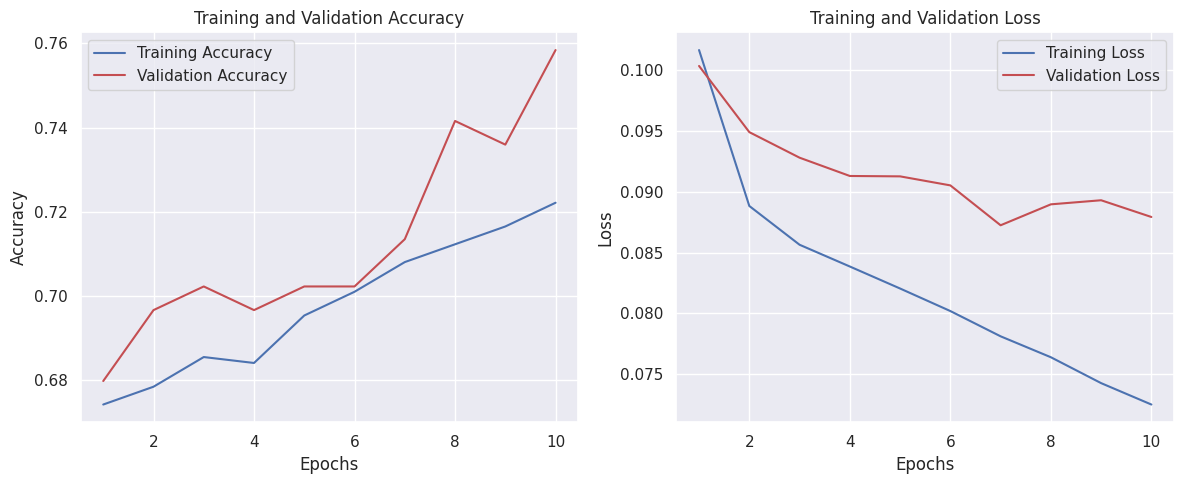

In [49]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=8, validation_data=(X_test_pad, y_test))
plot_training_history(history)

In [50]:
# Save the model during training
model.save('model1.keras')

# Verify the file exists
!ls


drive  model1.keras  naive_bayes_model.pkl  sample_data


In [51]:
loaded_model = tf.keras.models.load_model(
    'model1.keras', compile = False
)

# Check the loaded model's summary
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 171, 100)            │         147,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 100)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 154,359 (602.96 KB)

 Trainable params: 6,659 (26.01 KB)

 Non-trainable params: 147,700 (576.95 KB)

### **Results**

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


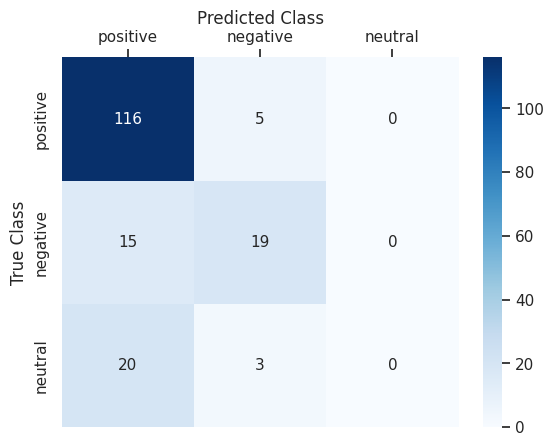

Classification Report :
               precision    recall  f1-score   support

    positive     0.7682    0.9587    0.8529       121
    negative     0.7037    0.5588    0.6230        34
     neutral     0.0000    0.0000    0.0000        23

    accuracy                         0.7584       178
   macro avg     0.4906    0.5058    0.4920       178
weighted avg     0.6566    0.7584    0.6988       178



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [52]:
model_outcomes_deep(loaded_model, X_test_pad, y_test)